In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.chdir(r"E:\Riz\365DS\Time Series")
os.getcwd()

'E:\\Riz\\365DS\\Time Series'

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [4]:
df_ts = raw_csv_data.copy()

In [5]:
df_ts.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [6]:
df_ts.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_ts.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

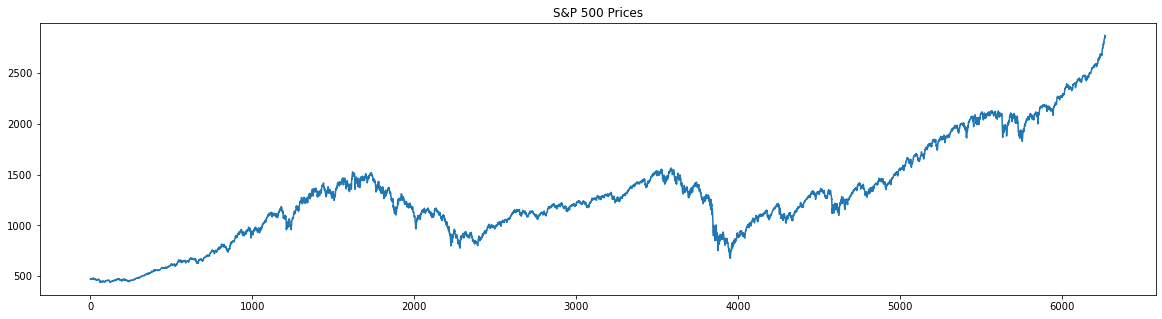

In [9]:
df_ts['spx'].plot(figsize=(20,5),title = "S&P 500 Prices")
plt.show()

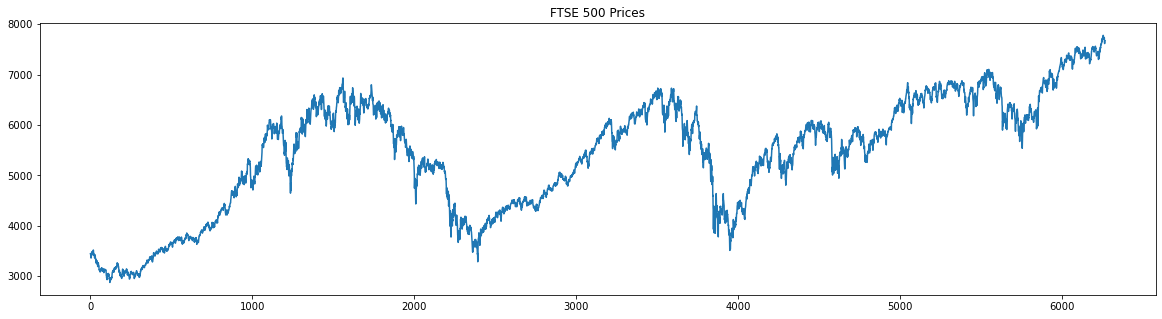

In [10]:
df_ts['ftse'].plot(figsize=(20,5),title = "FTSE 500 Prices")
plt.show()

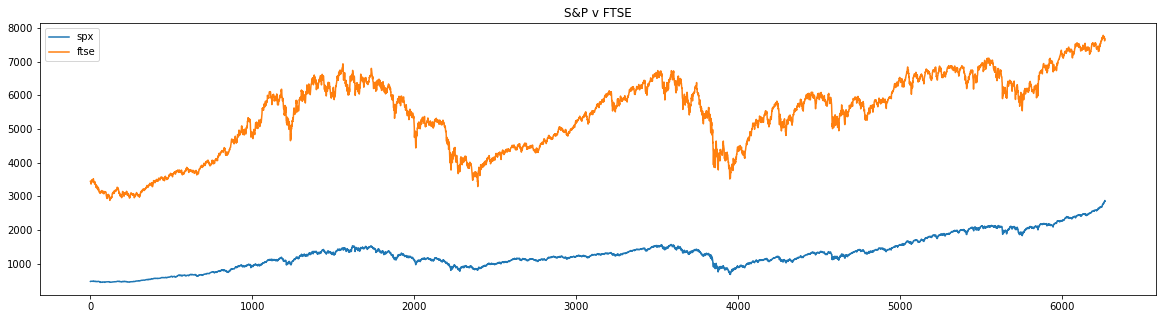

In [12]:
df_ts['spx'].plot(figsize=(20,5),title = "S&P 500 Prices")
df_ts['ftse'].plot(figsize=(20,5),title = "FTSE 500 Prices")
plt.title("S&P v FTSE")
plt.legend()
plt.show()

### QQ Plot

In [13]:
import scipy.stats
import pylab

<function matplotlib.pyplot.show(*args, **kw)>

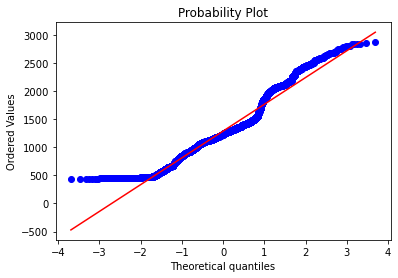

In [14]:
scipy.stats.probplot(df_ts['spx'],plot=pylab)
pylab.show

### Changing the datatype of the date column

In [15]:
df_ts['date'].describe() #Not a datetime series, it's an object as of now.

count           6269
unique          6269
top       09/10/2009
freq               1
Name: date, dtype: object

In [16]:
# pd.to_datetime?

In [17]:
#converting the date column into the datetime for analysis.
df_ts['date'] = pd.to_datetime(df_ts['date'], dayfirst=True)

In [18]:
df_ts.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
df_ts['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [20]:
#Setting the Index to the date series
df_ts.set_index('date',inplace=True)

In [21]:
df_ts.head(10)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-17,473.30,2115.56,3407.83,18725.37
1994-01-18,474.25,2130.35,3437.01,18514.55
1994-01-19,474.30,2132.52,3475.15,19039.40


In [22]:
#Setting the frequency for timeseries data. So that we may have values in continuous manner as per the freq set.
# Some of the freq we could define are -> 'h' - hourly, 'w'-weekly, 'm'-monthly, 'a'-annually, 'd'-daily, so on..

df_ts = df_ts.asfreq('d')

In [25]:
df_ts.head()
#check how you have NaN's for 8th & 9th, they weren't available in the data earlier.
# -These are sat & sunday which weren't added earlier
# To avoid these mishaps, we'll set the frequency to 'b'- business days instead of 'd' - all days..

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [24]:
df_ts.isna().sum()

spx       2520
dax       2520
ftse      2520
nikkei    2520
dtype: int64

In [26]:
df_ts = df_ts.asfreq('b')
#changed the freq to business days.

In [27]:
df_ts.head()
#No weekend values added which inturn contribute to missing values.

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [28]:
df_ts.isna().sum() #NA values reduced as compared to 'd'-all days to 'b'-only business days, yet added 8 missing values.

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

### Imputing missing values

In [29]:
# Front filling, assigns the value available on the previous period mentioned in the freq.
df_ts['spx'] = df_ts['spx'].fillna(method='ffill')

In [30]:
#Back filling imputes values for the next period. 
df_ts['ftse'] = df_ts['ftse'].fillna(method='bfill')

In [31]:
df_ts['dax'] = df_ts['dax'].fillna(value=df_ts['dax'].mean()) #mean imputing

In [32]:
df_ts['nikkei'] = df_ts['nikkei'].fillna(value = df_ts['nikkei'].median()) #median imputing

In [33]:
df_ts.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying the Dataset

In [34]:
df_ts['market_value'] = df_ts['spx'] #assigning spx values to a new column named market_value.

In [35]:
df_ts.head(3)

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13


In [36]:
# removing spx as it's redundant
del df_ts['spx']

In [37]:
#removing other columns as we want to only analyize market_value column.
del df_ts['dax'], df_ts['ftse'], df_ts['nikkei']

In [38]:
df_ts.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


In [39]:
#Splitting the data into train, test.
size = int(len(df_ts)*0.8) #Creating a sample. Shuffling is not ideal in timeseries data, as it messes up the index.
#size is the cuttoff point here.

In [40]:
df = df_ts.iloc[:size] #slicing upto 80% of the data.

In [41]:
df_test = df_ts.iloc[size:] #sclicing from 80% to 100%

In [42]:
df.tail() #checking the continuity of the data.

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [43]:
df_test.head() #begins from where we left off. 6th, 7th weren't business days.

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White Noise
- A special type of timeseries where the data doesn't follow a pattern
- In order to consider a series as white noise, it has to satisfy 3 conditions. 
- 1. Constant Mean.
- 2. Constant Variance.
- 3. Series has no autocorrelation (how correllated a series is with the past versions of itself).
i.e. NO autocorrelation means NO clear relationship b/w past and present values.

In [44]:
#generating white noise to compare it with the series we have at hand.
# In order to compare white noise with any data, set the mean and sd to that of the actual data (market_value) here.
wn = np.random.normal(loc=df['market_value'].mean(), scale=df['market_value'].std(), size=len(df))

In [45]:
#adding white noise to the data frame.
df['wn'] = wn

<ipython-input-45-93a41cf1ffba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [46]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,1272.291013
1994-01-10,475.27,835.716336
1994-01-11,474.13,1074.556165
1994-01-12,474.17,1326.573876
1994-01-13,472.47,969.158598


In [47]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.075807
std,292.559287,293.995843
min,438.920000,-213.027986
25%,914.620000,892.786248
50%,1144.650000,1088.599976
75%,1316.280729,1293.843810
max,1570.252238,2089.164077


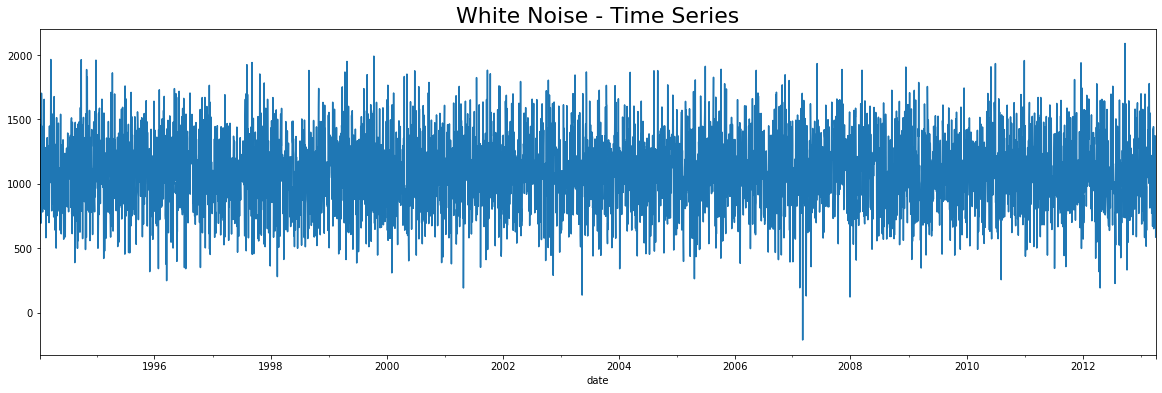

In [48]:
df['wn'].plot(figsize = (20,6))
plt.title("White Noise - Time Series", size = 22)
plt.show()
#density is high around the mean.

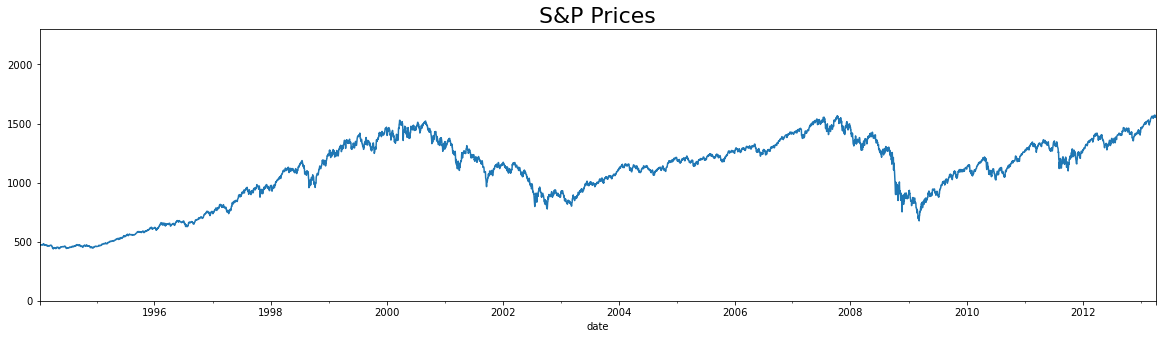

In [49]:
df['market_value'].plot(figsize=(20,5))
plt.title("S&P Prices", size=22)
plt.ylim(0,2300)
plt.show()

### Random Walk
- Special type of time-series, values tend to persist over time.
- The differences b/w periods are simply white noise.
- check for theory!

In [50]:
rw = pd.read_csv("RandWalk.csv")

In [51]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [52]:
rw['date'] = pd.to_datetime(rw['date'],dayfirst=True)

In [53]:
rw.set_index('date',inplace=True)

In [54]:
rw = rw.asfreq('b')

In [55]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [56]:
df['rw'] = rw['price']

<ipython-input-56-16ec294e5f69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw['price']


In [57]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1272.291013,1122.139662
1994-01-10,475.27,835.716336,1080.347860
1994-01-11,474.13,1074.556165,1082.095245
1994-01-12,474.17,1326.573876,1083.639265
1994-01-13,472.47,969.158598,1067.146255


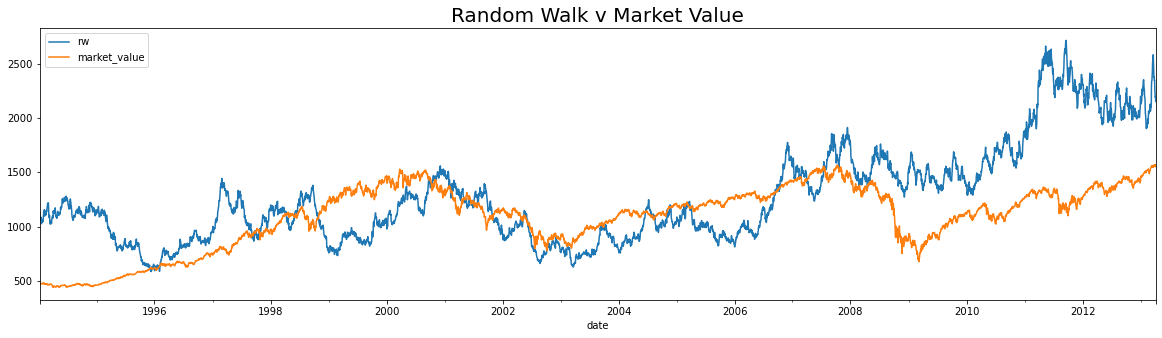

In [60]:
df['rw'].plot(figsize=(20,5))
df['market_value'].plot(figsize=(20,5))
plt.title("Random Walk v Market Value",size=20)
plt.legend()
plt.show()

- If a time series resembles a random walk, then the prices CANNOT be predicted with great accuracy.